# 0. 라이브러리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

# 1. 데이터셋 불러오기

#### 1. 데이터확인 및 불러오기

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
df1 = pd.read_csv("/content/drive/MyDrive/train_o.csv")
df2 = pd.read_csv('/content/drive/MyDrive/test_o.csv')
df3 = pd.read_csv("/content/drive/MyDrive/train_o.csv")

In [101]:
df1 = df1.drop('rn', axis=1)

In [ ]:
df2 = df2.drop('rn', axis=1)

In [104]:
df3 = df3.drop('rn', axis=1)

In [14]:
df1

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [15]:
df2

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,-0.9390,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,-0.9420,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,-0.9410,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,-0.9420,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,-0.9430,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,0.3300,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,-0.0726,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,0.0920,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,0.4030,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140


In [108]:
df3 = df3.iloc[:, 1:17]

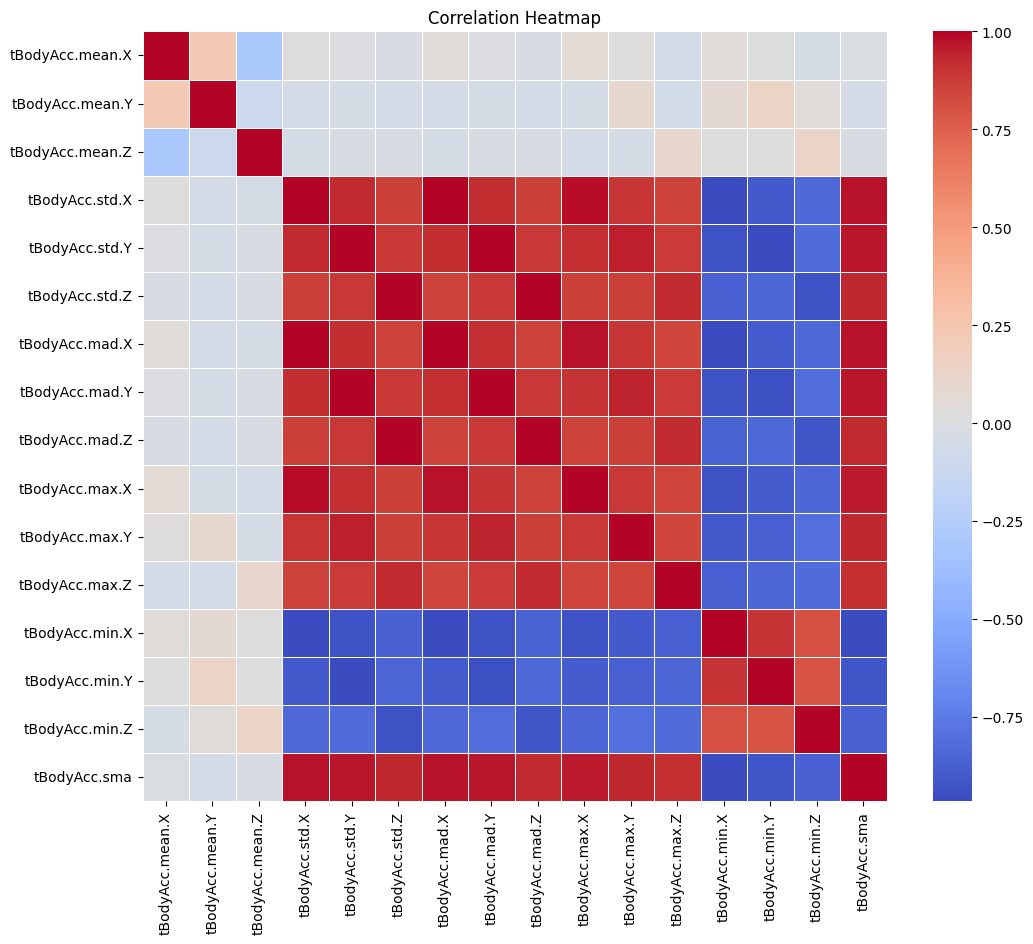

In [109]:
# 상관관계 확인
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
correlation_matrix = df3.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-110-3888d40553d5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


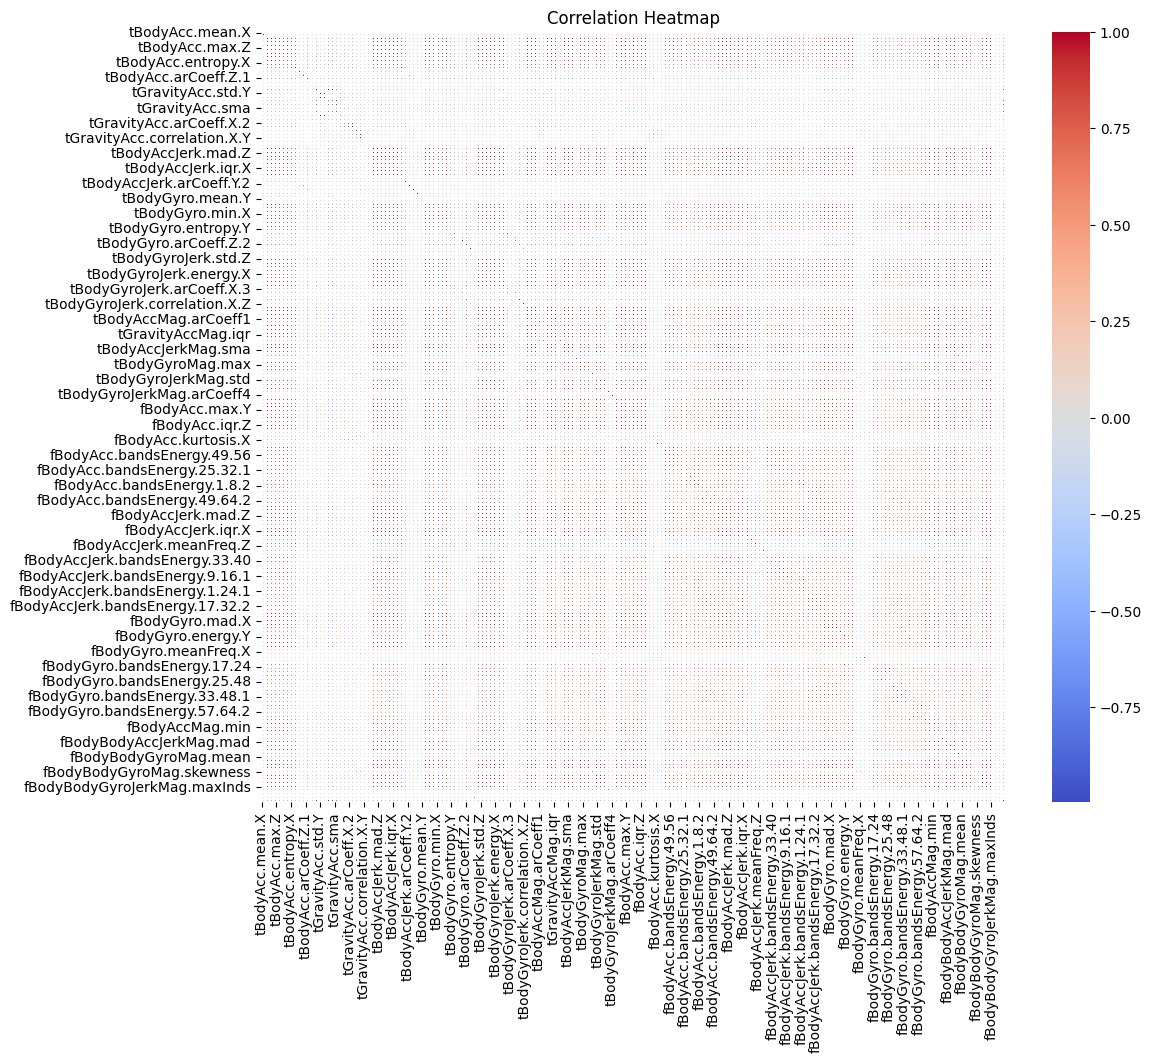

In [110]:
# 상관관계 확인
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
correlation_matrix = df1.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Activity 열을 제외한 나머지 모든 561개의 칼럼이 현재 Activity열과 상관관계를 가짐

# 2. 모델생성 - K-means _ df1 (train.csv)

In [18]:
from sklearn.cluster import KMeans

# K-Means 모델 생성
kmeans = KMeans(n_clusters=2) # 클러스터 갯수 2

#### 2-1. 정규화 및 모델학습

In [20]:
# 데이터 준비 (예를 들면, 특성 선택 및 스케일링)
X = df1.iloc[:, 3:]  # 데이터프레임의 필요한 열을 선택
# 데이터 스케일링 (옵션)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 표준화 함수 객체 생성
X_scaled = scaler.fit_transform(X) # X를 정규화

# 모델 학습
kmeans.fit(X_scaled) # kmeans모델에 적용시키기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [21]:
# 클러스터 라벨을 정규화된 X값을 K-means예측모델에 적용
cluster_labels = kmeans.predict(X_scaled)

In [22]:
# 데이터의 클러스터 행렬에 라벨링
df1['Cluster'] = cluster_labels

# 3. 시각화

#### t-SNE (확률적 이웃 임베딩)


- t-SNE는 "t-Distributed Stochastic Neighbor Embedding"의 약자로,
- 고차원 데이터를 저차원으로 축소하는 비선형 차원 축소 기술 중 하나
- t-SNE는 데이터의 유사성을 보존하는 데 중점을 둠.
- 특징
 - (1) 비선형 차원 축소: t-SNE는 고차원 공간에서의 데이터 포인트 간의 유사성을 측정하고, 이 유사성을 보존하면서 저차원으로 투영. 이는 고차원 데이터의 복잡한 구조를 감지하고 보다 간단한 저차원 구조로 매핑

 - (2) 클러스터링 강조: t-SNE는 데이터의 클러스터를 강조하고, 서로 다른 클러스터 간에는 거리를 멀게 만듬. 이로써 시각화나 클러스터링 과업에서 데이터의 구조를 뚜렷하게 나타낼 수 있음

 - (3) 확률 분포 모델링: t-SNE는 고차원과 저차원 데이터 사이의 확률 분포를 모델링. 고차원 데이터의 포인트들이 저차원에서 어떤 위치로 이동해야 하는지를 확률적으로 결정, 확률 분포를 최대한 유사하게 만들도록 함.

 - t-SNE는 데이터 시각화에 자주 활용되며, 주로 데이터의 구조를 이해하고 클러스터를 시각화하는 데 사용. 데이터 과학 및 머신러닝 분야에서 많은 시각화 작업에 도움을 줌

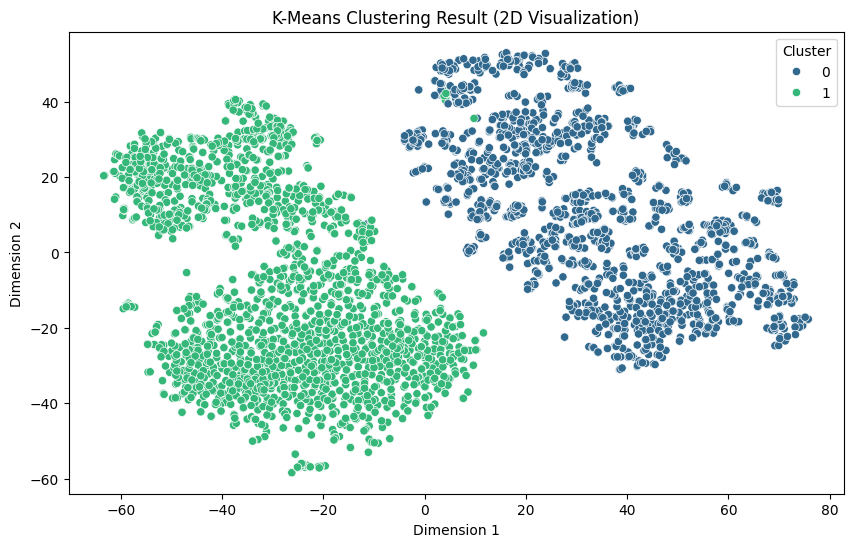

In [23]:
import seaborn as sns

# t-SNE를 사용하여 데이터를 2차원으로 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = cluster_labels

# Seaborn을 사용하여 클러스터별로 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('K-Means Clustering Result (2D Visualization)')
plt.show()

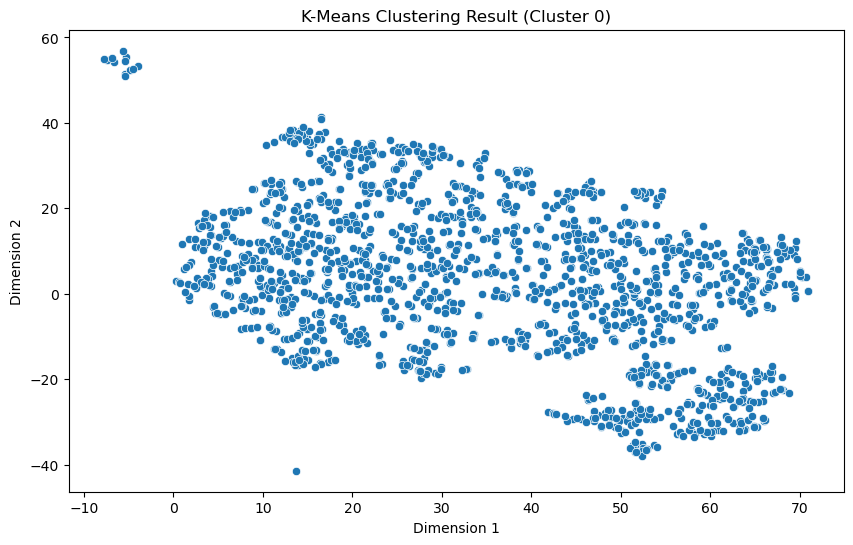

In [ ]:
# 클러스터 0에 해당하는 데이터만 필터링 =
cluster_0_df = df_tsne[df_tsne['Cluster'] == 0]

# Seaborn을 사용하여 클러스터 0 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
plt.title('K-Means Clustering Result (Cluster 0)')
plt.show()

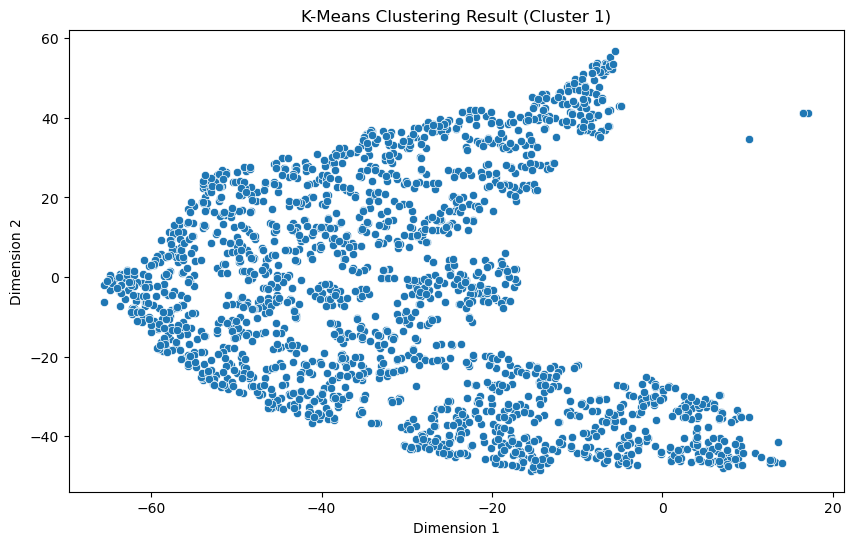

In [ ]:
# 클러스터 0에 해당하는 데이터만 필터링
cluster_0_df = df_tsne[df_tsne['Cluster'] == 1]

# Seaborn을 사용하여 클러스터 0 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
plt.title('K-Means Clustering Result (Cluster 1)')
plt.show()

In [ ]:
# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 2]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 2)')
# plt.show()

# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 3]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 3)')
# plt.show()

# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 4]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 4)')
# plt.show()

# # 클러스터 0에 해당하는 데이터만 필터링
# cluster_0_df = df_tsne[df_tsne['Cluster'] == 5]

# # Seaborn을 사용하여 클러스터 0 데이터 시각화
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_0_df, palette='viridis')
# plt.title('K-Means Clustering Result (Cluster 5)')
# plt.show()

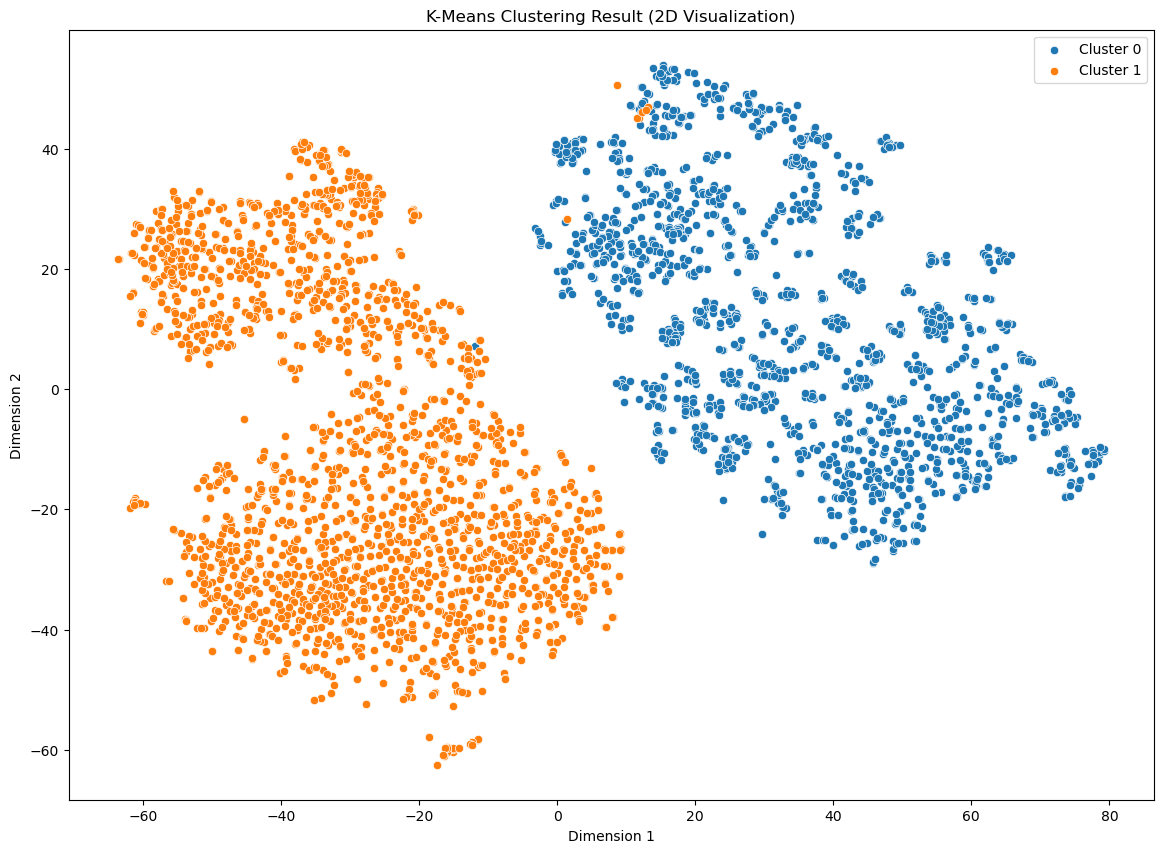

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# t-SNE를 사용하여 데이터를 2차원으로 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = cluster_labels

# 클러스터별로 데이터 시각화
plt.figure(figsize=(14, 10))
palette = sns.color_palette("hsv", as_cmap=True, n_colors=6)  # 6개의 서로 다른 색상을 선택

for cluster in range(6):
    cluster_df = df_tsne[df_tsne['Cluster'] == cluster]
    sns.scatterplot(x='Dimension 1', y='Dimension 2', data=cluster_df, palette=palette, label=f'Cluster {cluster}')

plt.title('K-Means Clustering Result (2D Visualization)')
plt.legend()
plt.show()

# 4. 평가지표(K-means)

고차원 데이터에 대한 정규화는 특히 중요. 고차원 데이터에서는 특성 간의 스케일 차이가 더 크게 나타나기 때문에 정규화가 더 필요

In [26]:
X = df1.iloc[:, 2:]  # 'activity' 열 이후의 모든 열 선택

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#고차원 데이터에 대한 정규화는 특히 중요고차원 데이터에서는 특성 간의 스케일 차이가 더 크게 나타나기 때문에 정규화가 더 필요

In [27]:
from sklearn.metrics import silhouette_score

k_range = range(2, 11)  # 클러스터 수 2에서 10까지 시도
# 실루엣 스코어를 저장할 리스트
silhouette_scores = []

# 엘보우 메서드를 사용하여 최적 클러스터 수 결정
distortions = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    distortions.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#### 실루엣 스코어
 - 클러스터링 내 데이터 포인트의 분포를 고려
 - 각 클러스터마다 얼마나 데이터 포인트가 밀집되어 있는지, 그리고 다른 클러스터와 얼마나 분리되어 있는지를 고려

#### 엘보우 메서드
 - 클러스터 간 거리를 고려
 - 클러스터 간 분산을 통해 클러스터의 갯수(K)를 선택
 - 엘보우 메서드는 클러스터 간 거리의 변화가 어느 지점에서 갑자기 둔화되는 팔꿈치 지점(K)을 찾음.

Text(0, 0.5, 'Silhouette Score')

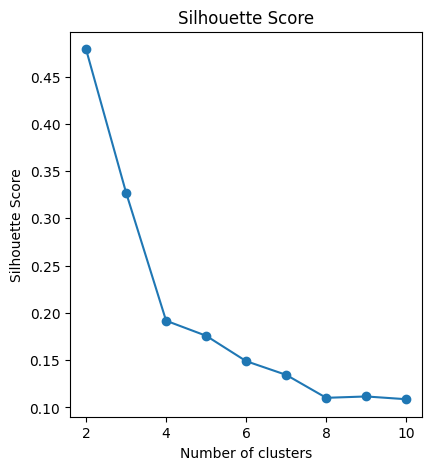

In [28]:
# 실루엣 스코어 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

클러스터의 갯수가 2일때 0.5 이상으로 가장 높은 실루엣 스코어를 기록

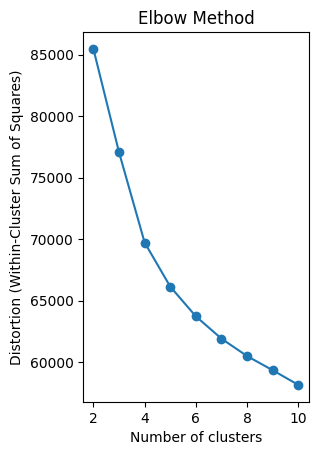

In [29]:
# 엘보우 메서드 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.show()

클러스터의 갯수가 2일때 0.5 이상으로 가장 높은 엘보우 메서드 점수를 기록

In [ ]:
# 엘보우메소드의 값을 근거로 클러스터링 갯수를 2으로 설정하여 k-means 적용해보기

In [30]:
from sklearn.cluster import KMeans

# K-Means 모델 생성
kmeans = KMeans(n_clusters=2) # 클러스터 갯수 2

In [31]:
# 데이터 준비 (예를 들면, 특성 선택 및 스케일링)
X = df1.iloc[:, 2:]  # 데이터프레임의 필요한 열을 선택
# 데이터 스케일링 (옵션)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 표준화 함수 객체 생성
X_scaled = scaler.fit_transform(X) # X를 정규화

# 모델 학습
kmeans.fit(X_scaled) # kmeans모델에 적용시키기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [32]:
cluster_labels = kmeans.predict(X_scaled) # 클러스터 라벨을 정규화된 X값을 K-means예측모델에 적용

In [33]:
df1['Cluster'] = cluster_labels # 데이터의 클러스터 행렬에 라벨링

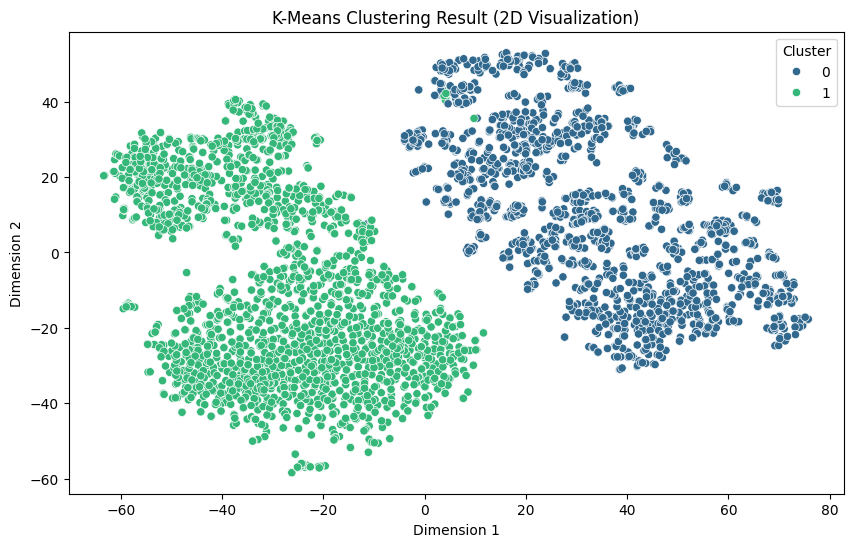

In [34]:
import seaborn as sns

# t-SNE를 사용하여 데이터를 2차원으로 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df1_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df1_tsne['Cluster'] = cluster_labels

# Seaborn을 사용하여 클러스터별로 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('K-Means Clustering Result (2D Visualization)')
plt.show()

# 2. KNN with Means로 유의미한 패턴찾기

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [38]:
df1 = pd.read_csv("/content/drive/MyDrive/train_o.csv")
df1 = df1.drop('rn', axis=1) # rn 컬럼은 의미가 없으므로
df1

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


# 3. tSNE 알고리즘을 활용해서 적절한 클러스터링 갯수 찾기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


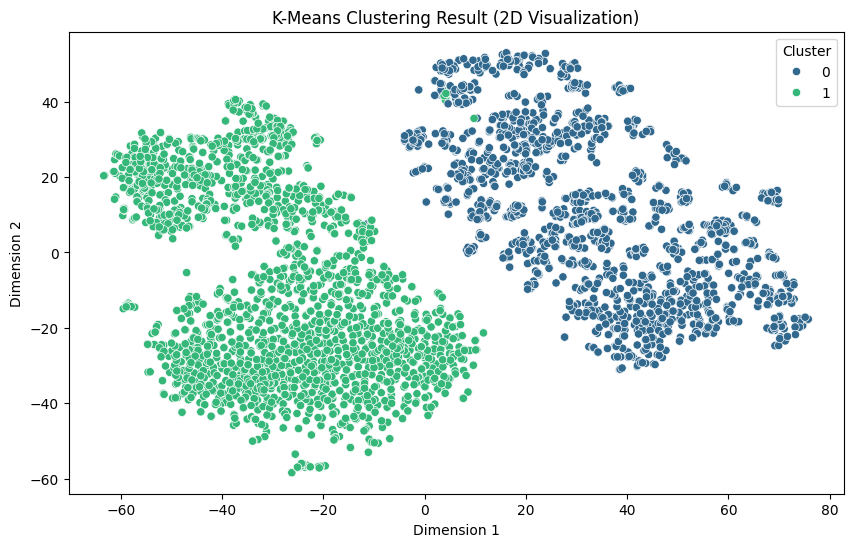

In [39]:
scaler = StandardScaler()
X = df1.iloc[:, 1:]
X_scaled = scaler.fit_transform(X)

# K-means 클러스터링
kmeans = KMeans(n_clusters=6, random_state=0) #왜 6일까? : Activity의 갯수가 6이기 때문
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# t-SNE를 사용하여 데이터를 2차원으로 시각화
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 2D 산점도를 그리기 위한 데이터프레임 생성
df1_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df1_tsne['Cluster'] = cluster_labels

# Seaborn을 사용하여 클러스터별로 데이터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('K-Means Clustering Result (2D Visualization)')
plt.show()

# 4. 랜덤포레스트

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [41]:
X1 = df1.drop('activity', axis=1)  # 'activity' 열을 타겟으로 설정
y1 = df1['activity']

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 나무의 개수 및 랜덤 시드 설정
model.fit(X1, y1)

RandomForestClassifier(random_state=42)

In [44]:
# Feature Importance 계산
importances = model.feature_importances_

In [45]:
feature_importance = pd.Series(importances, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 상위 중요도 특성 출력
print(feature_importance)

angle.X.gravityMean               0.031179
tGravityAcc.mean.X                0.030968
tGravityAcc.max.X                 0.030488
tGravityAcc.energy.X              0.024746
tGravityAcc.mean.Y                0.022002
                                    ...   
fBodyGyro.bandsEnergy.17.32.2     0.000058
fBodyBodyGyroJerkMag.energy       0.000036
fBodyAccJerk.bandsEnergy.25.32    0.000034
fBodyGyro.bandsEnergy.25.48.2     0.000027
fBodyGyro.bandsEnergy.57.64.1     0.000022
Length: 561, dtype: float64


angle.X.gravityMean               0.031179
tGravityAcc.mean.X                0.030968
tGravityAcc.max.X                 0.030488
tGravityAcc.energy.X              0.024746
tGravityAcc.mean.Y                0.022002
                                    ...   
fBodyGyro.bandsEnergy.17.32.2     0.000058
fBodyBodyGyroJerkMag.energy       0.000036
fBodyAccJerk.bandsEnergy.25.32    0.000034
fBodyGyro.bandsEnergy.25.48.2     0.000027
fBodyGyro.bandsEnergy.57.64.1     0.000022
Length: 561, dtype: float64


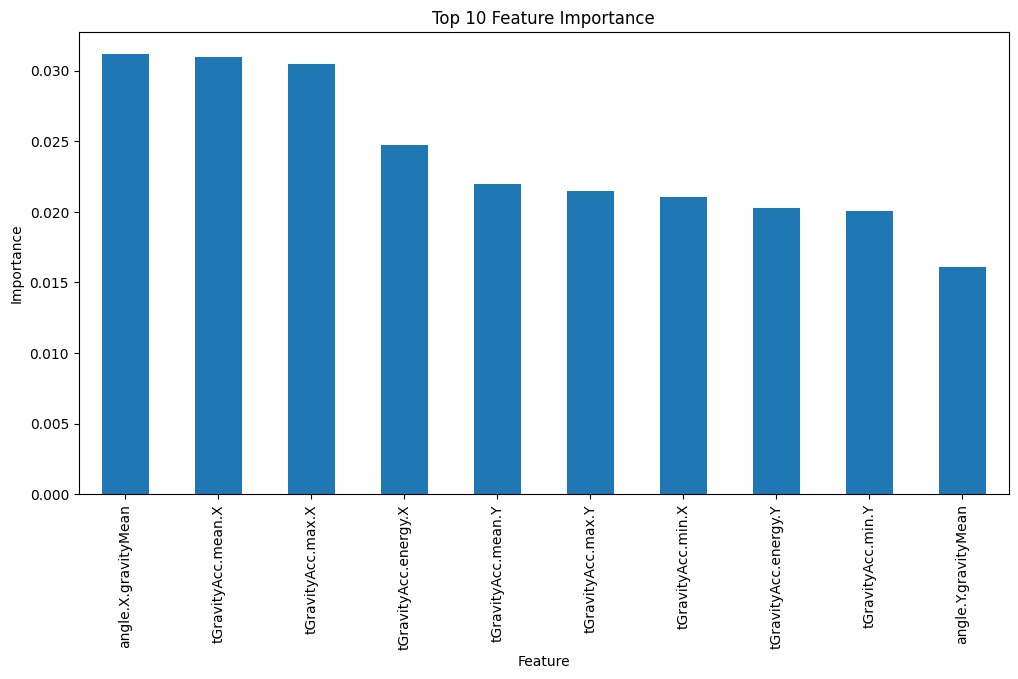

In [46]:
import matplotlib.pyplot as plt

# 중요도가 높은 순으로 정렬
feature_importance = pd.Series(importances, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# 상위 중요도 특성 출력
print(feature_importance)

# 중요도가 높은 순으로 상위 10개의 특성을 시각화
top_features = feature_importance.head(10)
top_features.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [72]:
# df1에서 특성과 레이블 분리 (예: 'Activity'가 레이블인 경우)
X_train = df1.drop('activity', axis=1)
y_train = df1['activity']

In [73]:
# 모델 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
# df2에서 'Activity' 열 제거 (없을 경우 이 단계 생략)
df2 = df2.drop(columns=['Activity', 'activity'], errors='ignore')

# df2에 대한 예측 수행
predicted_activities = rf_model.predict(df2)

# 예측 결과를 df2의 'Activity' 열에 저장
df2['Activity'] = predicted_activities

# 결과 확인
print(df2.head())

   tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  tBodyAcc.std.X  \
0            0.280          -0.0195           -0.113          -0.995   
1            0.277          -0.0166           -0.115          -0.998   
2            0.277          -0.0218           -0.121          -0.997   
3            0.279          -0.0148           -0.117          -0.997   
4            0.279          -0.0145           -0.107          -0.998   

   tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  tBodyAcc.mad.Y  \
0          -0.967          -0.979          -0.997          -0.964   
1          -0.981          -0.990          -0.998          -0.980   
2          -0.961          -0.984          -0.998          -0.957   
3          -0.982          -0.983          -0.997          -0.982   
4          -0.986          -0.993          -0.998          -0.985   

   tBodyAcc.mad.Z  tBodyAcc.max.X  ...  fBodyBodyGyroJerkMag.skewness  \
0          -0.977          -0.939  ...                         -0.391   
1     

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 실제 레이블
y_true = df2['Activity']
# 'Actual_Label'을 실제 레이블 열의 이름으로 변경해야 함

# 예측 레이블
y_pred = df2['Activity']

# 혼동 행렬
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 분류 보고서
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)

# 정확도
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[291   0   0   0   0   0]
 [  0 261   0   0   0   0]
 [  0   0 290   0   0   0]
 [  0   0   0 258   0   0]
 [  0   0   0   0 204   0]
 [  0   0   0   0   0 237]]
Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       291
           SITTING       1.00      1.00      1.00       261
          STANDING       1.00      1.00      1.00       290
           WALKING       1.00      1.00      1.00       258
WALKING_DOWNSTAIRS       1.00      1.00      1.00       204
  WALKING_UPSTAIRS       1.00      1.00      1.00       237

          accuracy                           1.00      1541
         macro avg       1.00      1.00      1.00      1541
      weighted avg       1.00      1.00      1.00      1541

Accuracy: 1.0


# 5. XGB Model

In [111]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드
df_train = pd.read_csv('/content/drive/MyDrive/train_o.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_o.csv')

# 불필요한 열 제거 (예: 'rn' 열)
df_train = df_train.drop('rn', axis=1)
df_test = df_test.drop('rn', axis=1)

In [112]:
df_train

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [113]:
df_test

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,NaN,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,NaN,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,NaN,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,NaN,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,NaN,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,NaN,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,NaN,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,NaN,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,NaN,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140


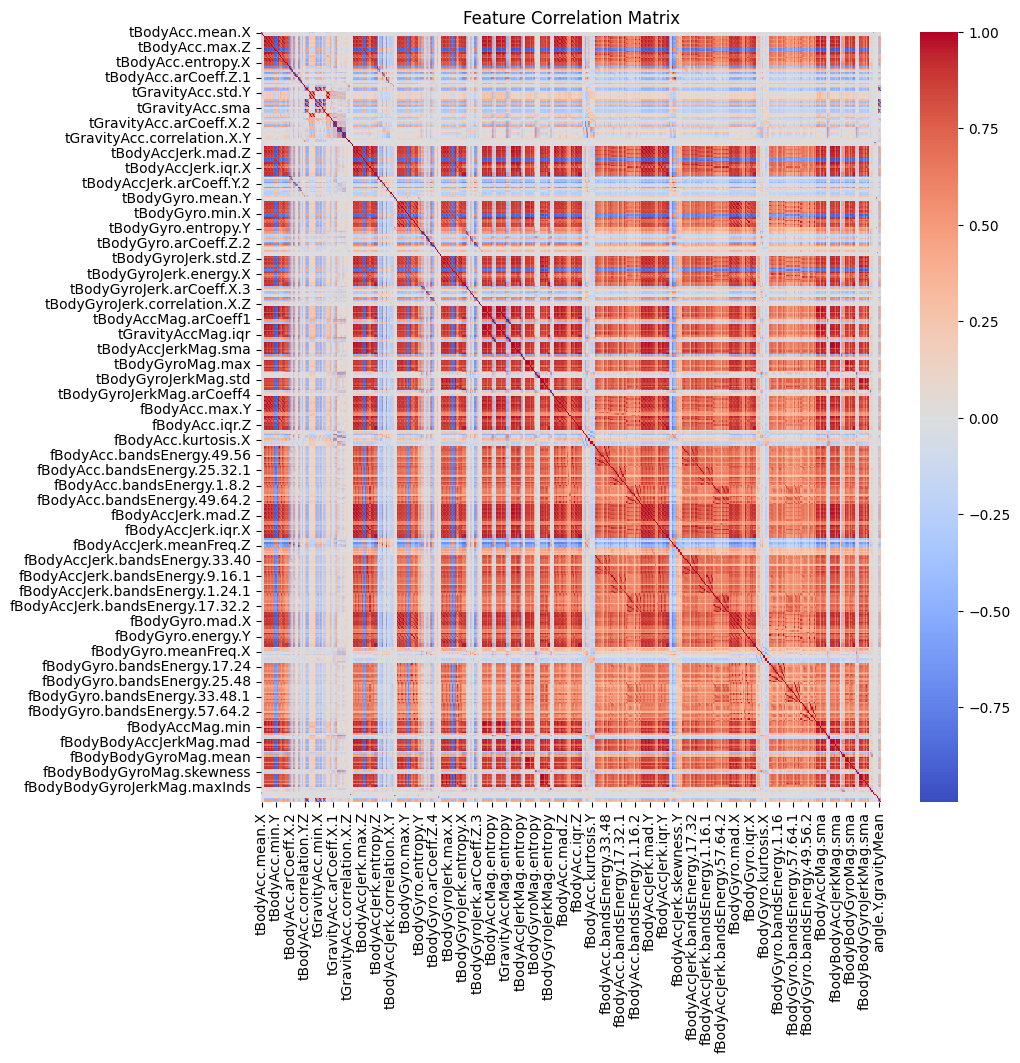

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로딩
df_train = pd.read_csv('/content/drive/MyDrive/train_o.csv')

# 불필요한 열 제거 (예: 'rn' 열, 'activity' 레이블 열)
df_train = df_train.drop(['rn', 'activity'], axis=1)

# 상관관계 행렬 계산
corr_matrix = df_train.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

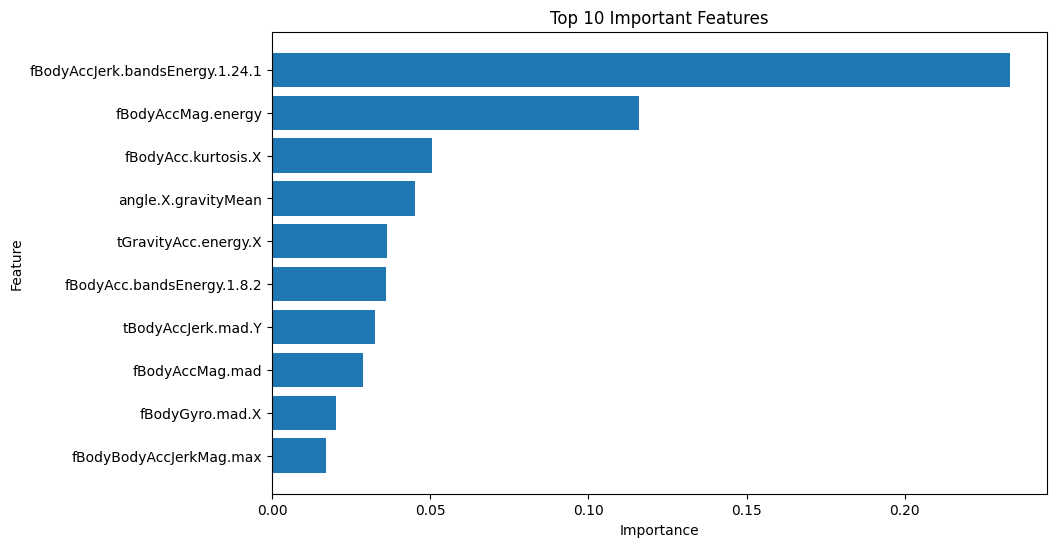

In [118]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# 데이터 로딩 및 모델 훈련 (이전 단계에서 수행된 것으로 가정)
# df_train = pd.read_csv('/content/drive/MyDrive/train_o.csv')
# X_train, y_train, xgb_model 등

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', num_class=6)

# 모델 훈련 (인코딩된 레이블 사용)
xgb_model.fit(X_train, y_train_encoded)

# 특성 중요도 계산
feature_importances = xgb_model.feature_importances_

# 특성 이름
feature_names = X_train.columns

# 특성 중요도를 DataFrame으로 변환
df_feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# 중요도에 따라 특성을 정렬
df_feature_importances = df_feature_importances.sort_values(by='importance', ascending=False)

# 상위 중요도 특성 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['feature'][:10], df_feature_importances['importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # 중요도가 높은 특성을 위로
plt.show()


In [114]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
label_encoder = LabelEncoder()

# 훈련 데이터셋에서 레이블 인코딩
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', num_class=6)

# 모델 훈련 (인코딩된 레이블 사용)
xgb_model.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=6, num_parallel_tree=None, ...)

In [115]:
# 테스트 데이터셋에서 특성만 추출
X_test = df_test.drop('activity', axis=1)

# 모델을 사용하여 테스트 데이터셋에 대한 예측 수행
y_pred = xgb_model.predict(X_test)

# 예측 결과를 'Activity' 열에 저장
df_test['activity'] = y_pred

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
df_train = pd.read_csv('/content/drive/MyDrive/train_o.csv')

# 불필요한 열 제거 (예: 'rn' 열)
df_train = df_train.drop('rn', axis=1)

# 훈련 데이터셋에서 특성과 레이블 분리
X = df_train.drop('activity', axis=1)  # 'activity' 열이 레이블이라고 가정
y = df_train['activity']

# 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', num_class=6)

# 교차 검증 수행
cv_scores = cross_val_score(xgb_model, X, y_encoded, cv=5)

# 결과 출력
print("교차 검증 점수:", cv_scores)
print("평균 점수:", cv_scores.mean())

교차 검증 점수: [0.93905817 0.90166205 0.95152355 0.93213296 0.92510402]
평균 점수: 0.9298961506986678


In [121]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# 훈련 데이터셋 로드
df_train = pd.read_csv('/content/drive/MyDrive/train_o.csv')
df_train = df_train.drop('rn', axis=1)  # 'rn' 열 제거

# 훈련 데이터셋에서 특성과 레이블 분리
X_train = df_train.drop('activity', axis=1)
y_train = df_train['activity']

# 레이블 인코딩
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBoost 모델 초기화 및 훈련
xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', num_class=6)
xgb_model.fit(X_train, y_train_encoded)

# 테스트 데이터셋 로드 및 전처리
df_test = pd.read_csv('/content/drive/MyDrive/test_o.csv')
df_test = df_test.drop('rn', axis=1)  # 'rn' 열 제거
X_test = df_test.drop('activity', axis=1)

# 테스트 데이터셋에 대한 예측 수행
y_pred = xgb_model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# 예측 결과를 'activity' 열에 저장
df_test['activity'] = y_pred_labels

# 변경된 테스트 데이터셋 저장 (옵션)
df_test.to_csv('/content/drive/MyDrive/test_o_predicted.csv', index=False)


In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# 교차 검증 수행
cv_scores = cross_val_score(xgb_model, X, y_encoded, cv=5)

# 결과 출력
print("교차 검증 점수:", cv_scores)
print("평균 점수:", cv_scores.mean())

교차 검증 점수: [0.93905817 0.90166205 0.95152355 0.93213296 0.92510402]
평균 점수: 0.9298961506986678


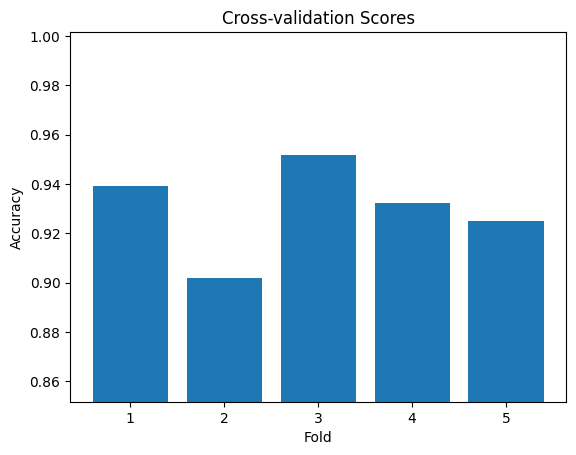

In [124]:
import matplotlib.pyplot as plt

# 교차 검증 점수 시각화
plt.bar(range(1, 6), cv_scores)
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)  # Y축 범위를 조정하여 모든 점수가 잘 보이게 함
plt.xticks(range(1, 6))  # X축 눈금 설정
plt.show()


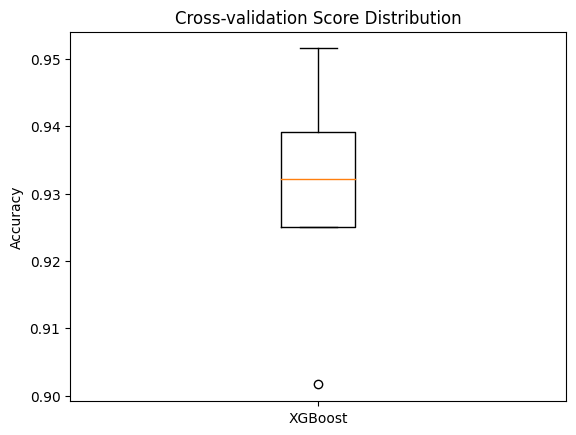

In [125]:
# 교차 검증 점수의 박스 플롯 시각화
plt.boxplot(cv_scores)
plt.title('Cross-validation Score Distribution')
plt.ylabel('Accuracy')
plt.xticks([1], ['XGBoost'])
plt.show()
